In [1]:
from keras import backend as K
import os
import importlib

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(K)
        assert K.backend() == backend

set_keras_backend("theano")
K.set_image_dim_ordering('th')

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,  Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils


In [3]:
batch_size = 128
nb_classes = 10

img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class metrics
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("One hot encoding: {}".format(Y_train[0, :]))

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples
One hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


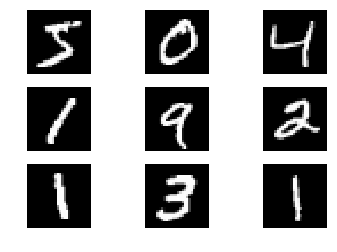

In [4]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis("off")

ref: http://eblearn.sourceforge.net/beginner_tutorial2_train.html

- Layer C1 is a convolution layer with 6 feature maps and a 5×5 kernel for each feature map.
- Layer S2 is a subsampling layer with 6 feature maps and a 2×2 kernel for each feature map.
- Layer C3 is a convolution layer with 16 feature maps and a 6×6 kernel for each feature map.
- Layer S4 is a subsampling layer with 16 feature maps and a 2×2 kernel for each feature map.
- Layer C5 is a convolution layer with 120 feature maps and a 6×6 kernel for each feature map.
- Layer C6 is a fully connected layer

In [5]:
model = Sequential()

# Layer C1
model.add(Convolution2D(6, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='same'))
# Layer S2
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer C3
model.add(Convolution2D(16, 5, 5, border_mode='same'))
# Layer S4
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Layer C5
model.add(Convolution2D(120, 5, 5))
# Layer C6
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(1, 28, 28..., padding="same")`
  after removing the cwd from sys.path.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same")`
  if __name__ == '__main__':
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(120, (5, 5))`
  


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [7]:
epochs = 2

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:',score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 95s 2ms/step - loss: 0.3286 - acc: 0.8962 - val_loss: 0.0655 - val_acc: 0.9800
Epoch 2/2
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0996 - acc: 0.9712 - val_loss: 0.0433 - val_acc: 0.9864
Test score: 0.043333694749319696
Test accuracy: 0.9864


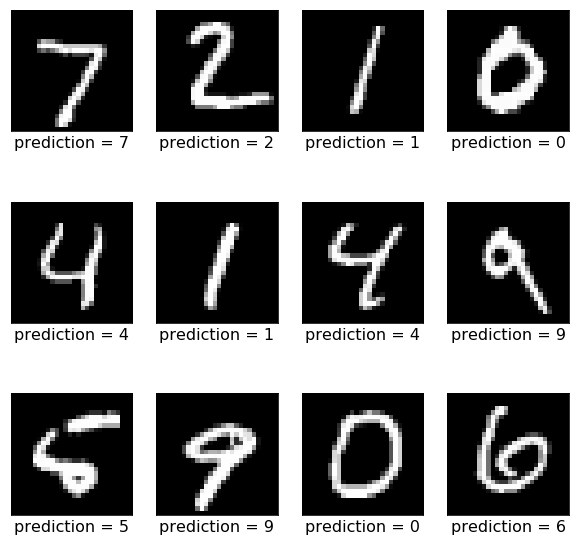

In [13]:
res = model.predict_classes(X_test[:12])
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[i,0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel("prediction = %d" % res[i], fontsize=16)
